In [1]:
# Import the necessary libraries
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import random
import shap
import sklearn
from sklearn.linear_model import Ridge  


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
# Input dataset
dataset = pd.read_excel("data_grid_demo.xlsx")
pd.options.display.float_format = '{:.9f}'.format
print(dataset)
scaler = StandardScaler()
scaler.fit(dataset)
scaled_dataset = scaler.transform(dataset)
scaled_dataset = pd.DataFrame(scaled_dataset, columns=['concentration', 'Temp', 'distance', 'g_r'])
scaled_dataset = scaled_dataset.round(9)
print(scaled_dataset)

# Output the scaled DataFrame to an Excel file
output_path = "scaled_data0.xlsx"
scaled_dataset.to_excel(output_path, index=False)
print(f"Scaled dataset saved to {output_path}")


       concentration  Temp    distance         g_r
0        0.000000000   300 0.008000000 0.000000000
1        0.000000000   300 0.024000000 0.000000000
2        0.000000000   300 0.040000000 0.000000000
3        0.000000000   300 0.056000000 0.000000000
4        0.000000000   300 0.072000000 0.000000000
...              ...   ...         ...         ...
97495    1.000000000   980 7.928000000 1.200910000
97496    1.000000000   980 7.944000000 1.213810000
97497    1.000000000   980 7.960000000 1.186710000
97498    1.000000000   980 7.976000000 1.171040000
97499    1.000000000   980 7.992000000 1.227060000

[97500 rows x 4 columns]
       concentration         Temp     distance          g_r
0       -1.662237005 -1.622053465 -1.728590163 -1.408753914
1       -1.662237005 -1.622053465 -1.721661946 -1.408753914
2       -1.662237005 -1.622053465 -1.714733729 -1.408753914
3       -1.662237005 -1.622053465 -1.707805512 -1.408753914
4       -1.662237005 -1.622053465 -1.700877295 -1.408753914
..

The figure layout has changed to tight


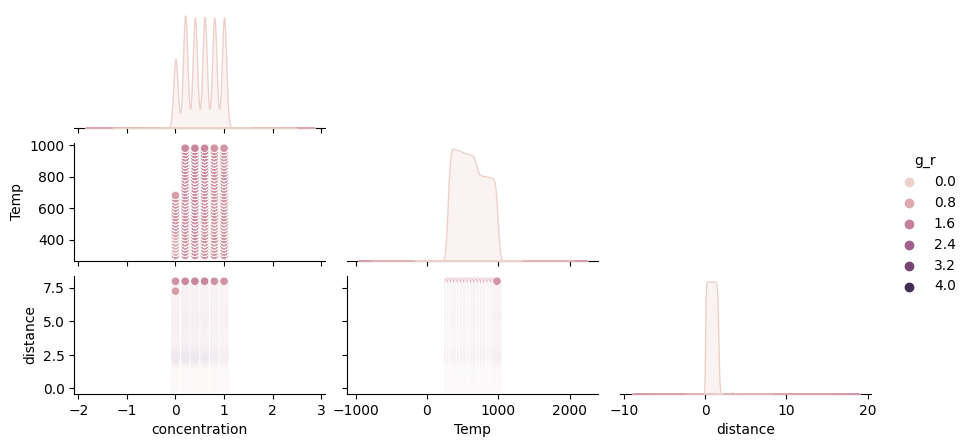

In [3]:
# Show the pairplot
ax=sns.pairplot(dataset, hue="g_r", aspect = 2, height = 1.5, corner=True)
plt.show()

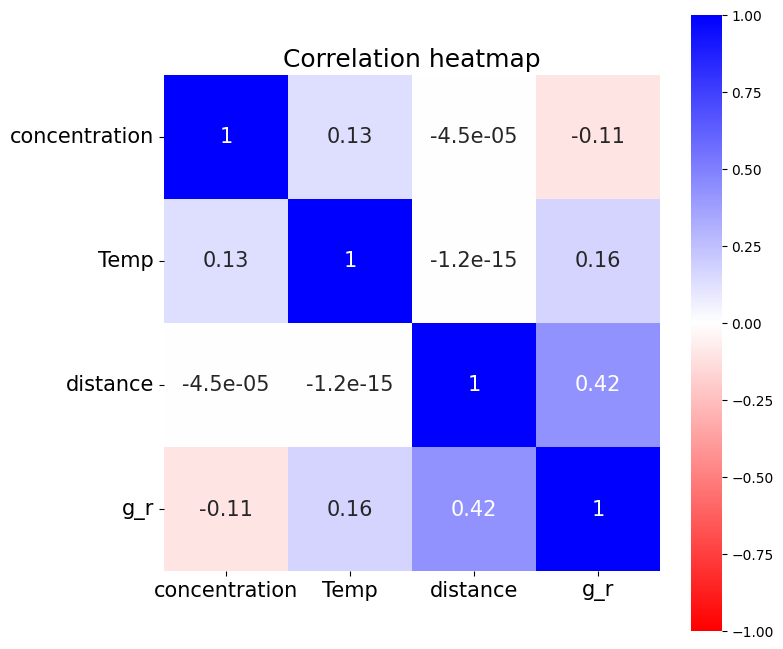

In [4]:
# Show the heatmap matrix
corr = dataset.corr()

plt.figure(figsize=(8, 8))
ax = sns.heatmap(corr, vmin=-1, vmax=1, square=True, annot=True, xticklabels=True, yticklabels=True, annot_kws={"size": 15}, cmap='bwr_r')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15) 
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15, rotation=0) 
plt.title('Correlation heatmap', fontsize=18)
plt.show()

In [5]:
# define Segmented linear regression functions
def SLregressor_train(train):
    SLR = {}
    D = [-1.728590163,-1.721661946,-1.714733729,-1.707805512,-1.700877295,-1.693949078,-1.687020861,-1.680092644,-1.673164426,-1.666236209,-1.659307992,-1.652379775,-1.645451558,-1.638523341,-1.631595124,-1.624666907,-1.61773869,-1.610810473,-1.603882256,-1.596954038,-1.590025821,-1.583097604,-1.576169387,-1.56924117,-1.562312953,-1.555384736,-1.548456519,-1.541528302,-1.534600085,-1.527671868,-1.520743651,-1.513815433,-1.506887216,-1.499958999,-1.493030782,-1.486102565,-1.479174348,-1.472246131,-1.465317914,-1.458389697,-1.45146148,-1.444533263,-1.437605045,-1.430676828,-1.423748611,-1.416820394,-1.409892177,-1.40296396,-1.396035743,-1.389107526,-1.382179309,-1.375251092,-1.368322875,-1.361394658,-1.35446644,-1.347538223,-1.340610006,-1.333681789,-1.326753572,-1.319825355,-1.312897138,-1.305968921,-1.299040704,-1.292112487,-1.28518427,-1.278256053,-1.271327835,-1.264399618,-1.257471401,-1.250543184,-1.243614967,-1.23668675,-1.229758533,-1.222830316,-1.215902099,-1.208973882,-1.202045665,-1.195117447,-1.18818923,-1.181261013,-1.174332796,-1.167404579,-1.160476362,-1.153548145,-1.146619928,-1.139691711,-1.132763494,-1.125835277,-1.11890706,-1.111978842,-1.105050625,-1.098122408,-1.091194191,-1.084265974,-1.077337757,-1.07040954,-1.063481323,-1.056553106,-1.049624889,-1.042696672,-1.035768454,-1.028840237,-1.02191202,-1.014983803,-1.008055586,-1.001127369,-0.994199152,-0.987270935,-0.980342718,-0.973414501,-0.966486284,-0.959558067,-0.952629849,-0.945701632,-0.938773415,-0.931845198,-0.924916981,-0.917988764,-0.911060547,-0.90413233,-0.897204113,-0.890275896,-0.883347679,-0.876419461,-0.869491244,-0.862563027,-0.85563481,-0.848706593,-0.841778376,-0.834850159,-0.827921942,-0.820993725,-0.814065508,-0.807137291,-0.800209074,-0.793280856,-0.786352639,-0.779424422,-0.772496205,-0.765567988,-0.758639771,-0.751711554,-0.744783337,-0.73785512,-0.730926903,-0.723998686,-0.717070468,-0.710142251,-0.703214034,-0.696285817,-0.6893576,-0.682429383,-0.675501166,-0.668572949,-0.661644732,-0.654716515,-0.647788298,-0.640860081,-0.633931863,-0.627003646,-0.620075429,-0.613147212,-0.606218995,-0.599290778,-0.592362561,-0.585434344,-0.578506127,-0.57157791,-0.564649693,-0.557721475,-0.550793258,-0.543865041,-0.536936824,-0.530008607,-0.52308039,-0.516152173,-0.509223956,-0.502295739,-0.495367522,-0.488439305,-0.481511088,-0.47458287,-0.467654653,-0.460726436,-0.453798219,-0.446870002,-0.439941785,-0.433013568,-0.426085351,-0.419157134,-0.412228917,-0.4053007,-0.398372482,-0.391444265,-0.384516048,-0.377587831,-0.370659614,-0.363731397,-0.35680318,-0.349874963,-0.342946746,-0.336018529,-0.329090312,-0.322162095,-0.315233877,-0.30830566,-0.301377443,-0.294449226,-0.287521009,-0.280592792,-0.273664575,-0.266736358,-0.259808141,-0.252879924,-0.245951707,-0.239023489,-0.232095272,-0.225167055,-0.218238838,-0.211310621,-0.204382404,-0.197454187,-0.19052597,-0.183597753,-0.176669536,-0.169741319,-0.162813102,-0.155884884,-0.148956667,-0.14202845,-0.135100233,-0.128172016,-0.121243799,-0.114315582,-0.107387365,-0.100459148,-0.093530931,-0.086602714,-0.079674496,-0.072746279,-0.065818062,-0.058889845,-0.051961628,-0.045033411,-0.038105194,-0.031176977,-0.02424876,-0.017320543,-0.010392326,-0.003464109,0.003464109,0.010392326,0.017320543,0.02424876,0.031176977,0.038105194,0.045033411,0.051961628,0.058889845,0.065818062,0.072746279,0.079674496,0.086602714,0.093530931,0.100459148,0.107387365,0.114315582,0.121243799,0.128172016,0.135100233,0.14202845,0.148956667,0.155884884,0.162813102,0.169741319,0.176669536,0.183597753,0.19052597,0.197454187,0.204382404,0.211310621,0.218238838,0.225167055,0.232095272,0.239023489,0.245951707,0.252879924,0.259808141,0.266736358,0.273664575,0.280592792,0.287521009,0.294449226,0.301377443,0.30830566,0.315233877,0.322162095,0.329090312,0.336018529,0.342946746,0.349874963,0.35680318,0.363731397,0.370659614,0.377587831,0.384516048,0.391444265,0.398372482,0.4053007,0.412228917,0.419157134,0.426085351,0.433013568,0.439941785,0.446870002,0.453798219,0.460726436,0.467654653,0.47458287,0.481511088,0.488439305,0.495367522,0.502295739,0.509223956,0.516152173,0.52308039,0.530008607,0.536936824,0.543865041,0.550793258,0.557721475,0.564649693,0.57157791,0.578506127,0.585434344,0.592362561,0.599290778,0.606218995,0.613147212,0.620075429,0.627003646,0.633931863,0.640860081,0.647788298,0.654716515,0.661644732,0.668572949,0.675501166,0.682429383,0.6893576,0.696285817,0.703214034,0.710142251,0.717070468,0.723998686,0.730926903,0.73785512,0.744783337,0.751711554,0.758639771,0.765567988,0.772496205,0.779424422,0.786352639,0.793280856,0.800209074,0.807137291,0.814065508,0.820993725,0.827921942,0.834850159,0.841778376,0.848706593,0.85563481,0.862563027,0.869491244,0.876419461,0.883347679,0.890275896,0.897204113,0.90413233,0.911060547,0.917988764,0.924916981,0.931845198,0.938773415,0.945701632,0.952629849,0.959558067,0.966486284,0.973414501,0.980342718,0.987270935,0.994199152,1.001127369,1.008055586,1.014983803,1.02191202,1.028840237,1.035768454,1.042696672,1.049624889,1.056553106,1.063481323,1.07040954,1.077337757,1.084265974,1.091194191,1.098122408,1.105050625,1.111978842,1.11890706,1.125835277,1.132763494,1.139691711,1.146619928,1.153548145,1.160476362,1.167404579,1.174332796,1.181261013,1.18818923,1.195117447,1.202045665,1.208973882,1.215902099,1.222830316,1.229758533,1.23668675,1.243614967,1.250543184,1.257471401,1.264399618,1.271327835,1.278256053,1.28518427,1.292112487,1.299040704,1.305968921,1.312897138,1.319825355,1.326753572,1.333681789,1.340610006,1.347538223,1.35446644,1.361394658,1.368322875,1.375251092,1.382179309,1.389107526,1.396035743,1.40296396,1.409892177,1.416820394,1.423748611,1.430676828,1.437605045,1.444533263,1.45146148,1.458389697,1.465317914,1.472246131,1.479174348,1.486102565,1.493030782,1.499958999,1.506887216,1.513815433,1.520743651,1.527671868,1.534600085,1.541528302,1.548456519,1.555384736,1.562312953,1.56924117,1.576169387,1.583097604,1.590025821,1.596954038,1.603882256,1.610810473,1.61773869,1.624666907,1.631595124,1.638523341,1.645451558,1.652379775,1.659307992,1.666236209,1.673164426,1.680092644,1.687020861,1.693949078,1.700877295,1.707805512,1.714733729,1.721661946,1.728590163]
    C = [-1.662237005,-1.044822929,-0.427408852,0.190005224,0.807419301,1.424833377]
    T = [-1.622053465,-1.422179578,-1.222305691,-1.022431805,
         -0.822557918,-0.622684031,-0.422810145,-0.222936258,
         -0.023062372,0.176811515,0.376685402,0.576559288,
         0.776433175,0.976307062,1.176180948,1.376054835,
         1.575928722
        ]
    for i in D:
        for j in C:
            for k in T:
                train_D = train.loc[train['distance'] == i]
                train_D = pd.DataFrame(train_D, columns=['concentration', 'Temp', 'distance', 'g_r'])
                train_DC = train_D.loc[(train_D['concentration'] == j) | (train_D['concentration'] == j+0.617414076)]
                train_DC = pd.DataFrame(train_DC, columns=['concentration', 'Temp', 'distance', 'g_r'])
                train_DCT = train_DC.loc[(train_DC['Temp'] == k) | (train_DC['Temp'] == k+0.199873887)]
                train_DCT = pd.DataFrame(train_DCT, columns=['concentration', 'Temp', 'distance', 'g_r'])
                x_DCT = train_DCT.drop("g_r", axis = 1)
                y_DCT = train_DCT.g_r
                SLR_DCT = Ridge(alpha=0.5)
                SLR_DCT.fit(x_DCT,y_DCT)
                str_DCT = str(i)+", "+str(j)+", "+str(k)
                SLR[str_DCT] = SLR_DCT
    return SLR

def SLregressor_predict(test, SLR):
    y = []
    num_rows = test.shape[0]
    for i in range(num_rows):
        if test.iloc[i, 1] < -1.422179578:
            if test.iloc[i, 0] < -1.044822929:
                str_DCT = f"{test.iloc[i, 2]}, -1.662237005, -1.622053465"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < -0.427408852:
                str_DCT = f"{test.iloc[i, 2]}, -1.044822929, -1.622053465"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 0.190005224:
                str_DCT = f"{test.iloc[i, 2]}, -0.427408852, -1.622053465"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 0.807419301:
                str_DCT = f"{test.iloc[i, 2]}, 0.190005224, -1.622053465"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 1.424833377:
                str_DCT = f"{test.iloc[i, 2]}, 0.807419301, -1.622053465"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            else:
                str_DCT = f"{test.iloc[i, 2]}, 1.424833377, -1.622053465"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
        elif test.iloc[i, 1] < -1.222305691:
            if test.iloc[i, 0] < -1.044822929:
                str_DCT = f"{test.iloc[i, 2]}, -1.662237005, -1.422179578"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < -0.427408852:
                str_DCT = f"{test.iloc[i, 2]}, -1.044822929, -1.422179578"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 0.190005224:
                str_DCT = f"{test.iloc[i, 2]}, -0.427408852, -1.422179578"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 0.807419301:
                str_DCT = f"{test.iloc[i, 2]}, 0.190005224, -1.422179578"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 1.424833377:
                str_DCT = f"{test.iloc[i, 2]}, 0.807419301, -1.422179578"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            else:
                str_DCT = f"{test.iloc[i, 2]}, 1.424833377, -1.422179578"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
        elif test.iloc[i, 1] < -1.022431805:
            if test.iloc[i, 0] < -1.044822929:
                str_DCT = f"{test.iloc[i, 2]}, -1.662237005, -1.222305691"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < -0.427408852:
                str_DCT = f"{test.iloc[i, 2]}, -1.044822929, -1.222305691"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 0.190005224:
                str_DCT = f"{test.iloc[i, 2]}, -0.427408852, -1.222305691"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 0.807419301:
                str_DCT = f"{test.iloc[i, 2]}, 0.190005224, -1.222305691"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 1.424833377:
                str_DCT = f"{test.iloc[i, 2]}, 0.807419301, -1.222305691"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            else:
                str_DCT = f"{test.iloc[i, 2]}, 1.424833377, -1.222305691"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
        elif test.iloc[i, 1] < -0.822557918:
            if test.iloc[i, 0] < -1.044822929:
                str_DCT = f"{test.iloc[i, 2]}, -1.662237005, -1.022431805"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < -0.427408852:
                str_DCT = f"{test.iloc[i, 2]}, -1.044822929, -1.022431805"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 0.190005224:
                str_DCT = f"{test.iloc[i, 2]}, -0.427408852, -1.022431805"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 0.807419301:
                str_DCT = f"{test.iloc[i, 2]}, 0.190005224, -1.022431805"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 1.424833377:
                str_DCT = f"{test.iloc[i, 2]}, 0.807419301, -1.022431805"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            else:
                str_DCT = f"{test.iloc[i, 2]}, 1.424833377, -1.022431805"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
        elif test.iloc[i, 1] < -0.622684031:
            if test.iloc[i, 0] < -1.044822929:
                str_DCT = f"{test.iloc[i, 2]}, -1.662237005, -0.822557918"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < -0.427408852:
                str_DCT = f"{test.iloc[i, 2]}, -1.044822929, -0.822557918"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 0.190005224:
                str_DCT = f"{test.iloc[i, 2]}, -0.427408852, -0.822557918"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 0.807419301:
                str_DCT = f"{test.iloc[i, 2]}, 0.190005224, -0.822557918"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 1.424833377:
                str_DCT = f"{test.iloc[i, 2]}, 0.807419301, -0.822557918"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            else:
                str_DCT = f"{test.iloc[i, 2]}, 1.424833377, -0.822557918"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
        elif test.iloc[i, 1] < -0.422810145:
            if test.iloc[i, 0] < -1.044822929:
                str_DCT = f"{test.iloc[i, 2]}, -1.662237005, -0.622684031"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < -0.427408852:
                str_DCT = f"{test.iloc[i, 2]}, -1.044822929, -0.622684031"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 0.190005224:
                str_DCT = f"{test.iloc[i, 2]}, -0.427408852, -0.622684031"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 0.807419301:
                str_DCT = f"{test.iloc[i, 2]}, 0.190005224, -0.622684031"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 1.424833377:
                str_DCT = f"{test.iloc[i, 2]}, 0.807419301, -0.622684031"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            else:
                str_DCT = f"{test.iloc[i, 2]}, 1.424833377, -0.622684031"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
        elif test.iloc[i, 1] < -0.222936258:
            if test.iloc[i, 0] < -1.044822929:
                str_DCT = f"{test.iloc[i, 2]}, -1.662237005, -0.422810145"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < -0.427408852:
                str_DCT = f"{test.iloc[i, 2]}, -1.044822929, -0.422810145"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 0.190005224:
                str_DCT = f"{test.iloc[i, 2]}, -0.427408852, -0.422810145"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 0.807419301:
                str_DCT = f"{test.iloc[i, 2]}, 0.190005224, -0.422810145"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 1.424833377:
                str_DCT = f"{test.iloc[i, 2]}, 0.807419301, -0.422810145"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            else:
                str_DCT = f"{test.iloc[i, 2]}, 1.424833377, -0.422810145"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
        elif test.iloc[i, 1] < -0.023062372:
            if test.iloc[i, 0] < -1.044822929:
                str_DCT = f"{test.iloc[i, 2]}, -1.662237005, -0.222936258"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < -0.427408852:
                str_DCT = f"{test.iloc[i, 2]}, -1.044822929, -0.222936258"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 0.190005224:
                str_DCT = f"{test.iloc[i, 2]}, -0.427408852, -0.222936258"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 0.807419301:
                str_DCT = f"{test.iloc[i, 2]}, 0.190005224, -0.222936258"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 1.424833377:
                str_DCT = f"{test.iloc[i, 2]}, 0.807419301, -0.222936258"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            else:
                str_DCT = f"{test.iloc[i, 2]}, 1.424833377, -0.222936258"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
        elif test.iloc[i, 1] < 0.176811515:
            if test.iloc[i, 0] < -1.044822929:
                str_DCT = f"{test.iloc[i, 2]}, -1.662237005, -0.023062372"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < -0.427408852:
                str_DCT = f"{test.iloc[i, 2]}, -1.044822929, -0.023062372"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 0.190005224:
                str_DCT = f"{test.iloc[i, 2]}, -0.427408852, -0.023062372"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 0.807419301:
                str_DCT = f"{test.iloc[i, 2]}, 0.190005224, -0.023062372"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 1.424833377:
                str_DCT = f"{test.iloc[i, 2]}, 0.807419301, -0.023062372"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            else:
                str_DCT = f"{test.iloc[i, 2]}, 1.424833377, -0.023062372"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
        elif test.iloc[i, 1] < 0.376685402:
            if test.iloc[i, 0] < -1.044822929:
                str_DCT = f"{test.iloc[i, 2]}, -1.662237005, 0.176811515"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < -0.427408852:
                str_DCT = f"{test.iloc[i, 2]}, -1.044822929, 0.176811515"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 0.190005224:
                str_DCT = f"{test.iloc[i, 2]}, -0.427408852, 0.176811515"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 0.807419301:
                str_DCT = f"{test.iloc[i, 2]}, 0.190005224, 0.176811515"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 1.424833377:
                str_DCT = f"{test.iloc[i, 2]}, 0.807419301, 0.176811515"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            else:
                str_DCT = f"{test.iloc[i, 2]}, 1.424833377, 0.176811515"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
        elif test.iloc[i, 1] < 0.576559288:
            if test.iloc[i, 0] < -1.044822929:
                str_DCT = f"{test.iloc[i, 2]}, -1.662237005, 0.376685402"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < -0.427408852:
                str_DCT = f"{test.iloc[i, 2]}, -1.044822929, 0.376685402"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 0.190005224:
                str_DCT = f"{test.iloc[i, 2]}, -0.427408852, 0.376685402"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 0.807419301:
                str_DCT = f"{test.iloc[i, 2]}, 0.190005224, 0.376685402"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 1.424833377:
                str_DCT = f"{test.iloc[i, 2]}, 0.807419301, 0.376685402"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            else:
                str_DCT = f"{test.iloc[i, 2]}, 1.424833377, 0.376685402"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
        elif test.iloc[i, 1] < 0.776433175:
            if test.iloc[i, 0] < -1.044822929:
                str_DCT = f"{test.iloc[i, 2]}, -1.662237005, 0.576559288"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < -0.427408852:
                str_DCT = f"{test.iloc[i, 2]}, -1.044822929, 0.576559288"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 0.190005224:
                str_DCT = f"{test.iloc[i, 2]}, -0.427408852, 0.576559288"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 0.807419301:
                str_DCT = f"{test.iloc[i, 2]}, 0.190005224, 0.576559288"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 1.424833377:
                str_DCT = f"{test.iloc[i, 2]}, 0.807419301, 0.576559288"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            else:
                str_DCT = f"{test.iloc[i, 2]}, 1.424833377, 0.576559288"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
        elif test.iloc[i, 1] < 0.976307062:
            if test.iloc[i, 0] < -1.044822929:
                str_DCT = f"{test.iloc[i, 2]}, -1.662237005, 0.776433175"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < -0.427408852:
                str_DCT = f"{test.iloc[i, 2]}, -1.044822929, 0.776433175"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 0.190005224:
                str_DCT = f"{test.iloc[i, 2]}, -0.427408852, 0.776433175"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 0.807419301:
                str_DCT = f"{test.iloc[i, 2]}, 0.190005224, 0.776433175"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 1.424833377:
                str_DCT = f"{test.iloc[i, 2]}, 0.807419301, 0.776433175"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            else:
                str_DCT = f"{test.iloc[i, 2]}, 1.424833377, 0.776433175"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
        elif test.iloc[i, 1] < 1.176180948:
            if test.iloc[i, 0] < -1.044822929:
                str_DCT = f"{test.iloc[i, 2]}, -1.662237005, 0.976307062"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < -0.427408852:
                str_DCT = f"{test.iloc[i, 2]}, -1.044822929, 0.976307062"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 0.190005224:
                str_DCT = f"{test.iloc[i, 2]}, -0.427408852, 0.976307062"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 0.807419301:
                str_DCT = f"{test.iloc[i, 2]}, 0.190005224, 0.976307062"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 1.424833377:
                str_DCT = f"{test.iloc[i, 2]}, 0.807419301, 0.976307062"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            else:
                str_DCT = f"{test.iloc[i, 2]}, 1.424833377, 0.976307062"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
        elif test.iloc[i, 1] < 1.376054835:
            if test.iloc[i, 0] < -1.044822929:
                str_DCT = f"{test.iloc[i, 2]}, -1.662237005, 1.176180948"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < -0.427408852:
                str_DCT = f"{test.iloc[i, 2]}, -1.044822929, 1.176180948"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 0.190005224:
                str_DCT = f"{test.iloc[i, 2]}, -0.427408852, 1.176180948"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 0.807419301:
                str_DCT = f"{test.iloc[i, 2]}, 0.190005224, 1.176180948"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 1.424833377:
                str_DCT = f"{test.iloc[i, 2]}, 0.807419301, 1.176180948"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            else:
                str_DCT = f"{test.iloc[i, 2]}, 1.424833377, 1.176180948"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
        elif test.iloc[i, 1] < 1.575928722:
            if test.iloc[i, 0] < -1.044822929:
                str_DCT = f"{test.iloc[i, 2]}, -1.662237005, 1.376054835"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < -0.427408852:
                str_DCT = f"{test.iloc[i, 2]}, -1.044822929, 1.376054835"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 0.190005224:
                str_DCT = f"{test.iloc[i, 2]}, -0.427408852, 1.376054835"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 0.807419301:
                str_DCT = f"{test.iloc[i, 2]}, 0.190005224, 1.376054835"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 1.424833377:
                str_DCT = f"{test.iloc[i, 2]}, 0.807419301, 1.376054835"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            else:
                str_DCT = f"{test.iloc[i, 2]}, 1.424833377, 1.376054835"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])   
        else:
            if test.iloc[i, 0] < -1.044822929:
                str_DCT = f"{test.iloc[i, 2]}, -1.662237005, 1.575928722"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < -0.427408852:
                str_DCT = f"{test.iloc[i, 2]}, -1.044822929, 1.575928722"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 0.190005224:
                str_DCT = f"{test.iloc[i, 2]}, -0.427408852, 1.575928722"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 0.807419301:
                str_DCT = f"{test.iloc[i, 2]}, 0.190005224, 1.575928722"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            elif test.iloc[i, 0] < 1.424833377:
                str_DCT = f"{test.iloc[i, 2]}, 0.807419301, 1.575928722"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
            else:
                str_DCT = f"{test.iloc[i, 2]}, 1.424833377, 1.575928722"
                y.append(SLR[str_DCT].predict(test.iloc[[i]].drop("g_r", axis=1))[0])
    return y




In [15]:
# train models
train = scaled_dataset.loc[(scaled_dataset['Temp'] == -1.622053465) | (scaled_dataset['Temp'] == -1.422179578) | 
                           (scaled_dataset['Temp'] == -1.222305691) | (scaled_dataset['Temp'] == -1.022431805) | 
                           (scaled_dataset['Temp'] == -0.822557918) | (scaled_dataset['Temp'] == -0.622684031) | 
                           (scaled_dataset['Temp'] == -0.422810145) | (scaled_dataset['Temp'] == -0.222936258) | 
                           (scaled_dataset['Temp'] == -0.023062372) | (scaled_dataset['Temp'] ==  0.176811515) |
                           (scaled_dataset['Temp'] ==  0.376685402) | (scaled_dataset['Temp'] ==  0.576559288) |
                           (scaled_dataset['Temp'] ==  0.776433175) | (scaled_dataset['Temp'] ==  0.976307062) |
                           (scaled_dataset['Temp'] ==  1.176180948) | (scaled_dataset['Temp'] ==  1.376054835) |
                           (scaled_dataset['Temp'] ==  1.575928722) | (scaled_dataset['Temp'] ==  1.775802608)]
train = pd.DataFrame(train, columns=['concentration', 'Temp', 'distance', 'g_r'])
print(train)
SLR = SLregressor_train(train)
test0 = scaled_dataset.loc[(scaled_dataset['Temp'] == -1.522116521) | (scaled_dataset['Temp'] == -1.322242635) | 
                           (scaled_dataset['Temp'] == -1.122368748) | (scaled_dataset['Temp'] == -0.922494861) | 
                           (scaled_dataset['Temp'] == -0.722620975) | (scaled_dataset['Temp'] == -0.522747088) | 
                           (scaled_dataset['Temp'] == -0.322873202) | (scaled_dataset['Temp'] == -0.122999315) | 
                           (scaled_dataset['Temp'] ==  0.076874572) | (scaled_dataset['Temp'] ==  0.276748458) |
                           (scaled_dataset['Temp'] ==  0.476622345) | (scaled_dataset['Temp'] ==  0.676496232) |
                           (scaled_dataset['Temp'] ==  0.876370118) | (scaled_dataset['Temp'] ==  1.076244005) |
                           (scaled_dataset['Temp'] ==  1.276117892) | (scaled_dataset['Temp'] ==  1.475991778) |
                           (scaled_dataset['Temp'] ==  1.675865665)]
test0 = pd.DataFrame(test0, columns=['concentration', 'Temp', 'distance', 'g_r'])
print(test0)
y_pred_scaled = SLregressor_predict(test0, SLR)
test1 = test0.copy()
print(test1)
test1 = scaler.inverse_transform(test1)
test1 = pd.DataFrame(test1, columns=['concentration', 'Temp', 'distance', 'g_r'])
test1 = test1.round(6)
print(test1)
test0['g_r'] = y_pred_scaled
print(test0)
test0 = scaler.inverse_transform(test0)
test0 = pd.DataFrame(test0, columns=['concentration', 'Temp', 'distance', 'g_r'])
test0 = test0.round(6)
print(test0)
mse_baseline = mean_squared_error(test1.g_r, test0.g_r)
rmse_baseline = mean_squared_error(test1.g_r, test0.g_r, squared=False)
mae_baseline = mean_absolute_error(test1.g_r, test0.g_r)
r2_baseline = r2_score(test1.g_r, test0.g_r)
print(f'Baseline model scores:\nMSE = {mse_baseline:.10f}\nRMSE = {rmse_baseline:.4f}\nMAE = {mae_baseline:.10f}\nR Squared = {r2_baseline:.10f}')


       concentration         Temp     distance          g_r
0       -1.662237005 -1.622053465 -1.728590163 -1.408753914
1       -1.662237005 -1.622053465 -1.721661946 -1.408753914
2       -1.662237005 -1.622053465 -1.714733729 -1.408753914
3       -1.662237005 -1.622053465 -1.707805512 -1.408753914
4       -1.662237005 -1.622053465 -1.700877295 -1.408753914
...              ...          ...          ...          ...
97495    1.424833377  1.775802608  1.700877295  0.217283118
97496    1.424833377  1.775802608  1.707805512  0.234749771
97497    1.424833377  1.775802608  1.714733729  0.198056260
97498    1.424833377  1.775802608  1.721661946  0.176839017
97499    1.424833377  1.775802608  1.728590163  0.252690325

[50000 rows x 4 columns]
       concentration         Temp     distance          g_r
500     -1.662237005 -1.522116521 -1.728590163 -1.408753914
501     -1.662237005 -1.522116521 -1.721661946 -1.408753914
502     -1.662237005 -1.522116521 -1.714733729 -1.408753914
503     -1.662

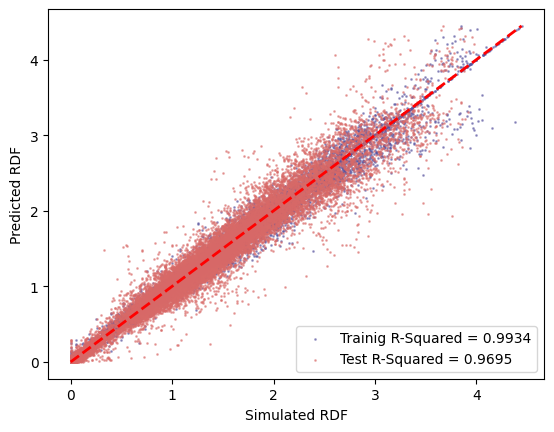

In [16]:
# scatter plot
y_train_pred_scaled = SLregressor_predict(train, SLR)
train1 = train.copy()
train1 = scaler.inverse_transform(train1)
train1 = pd.DataFrame(train1, columns=['concentration', 'Temp', 'distance', 'g_r'])
train1 = train1.round(6)
train['g_r'] = y_train_pred_scaled
train = scaler.inverse_transform(train)
train = pd.DataFrame(train, columns=['concentration', 'Temp', 'distance', 'g_r'])
train = train.round(6)
r2_train = r2_score(train1.g_r, train.g_r)
plt.scatter(train1.g_r, train.g_r, alpha=0.5, label = f'Trainig R-Squared = {r2_train:.4f}', s =1, c='#58539f')
plt.scatter(test1.g_r, test0.g_r, alpha=0.5, label = f'Test R-Squared = {r2_baseline:.4f}', s =1, c='#d86967' )
plt.plot([min(train1.g_r), max(train1.g_r)], [min(train1.g_r), max(train1.g_r)], '--', color='red', linewidth=2)
plt.xlabel('Simulated RDF')
plt.ylabel('Predicted RDF')
legend = plt.legend(loc='lower right', fontsize='medium')
plt.show()


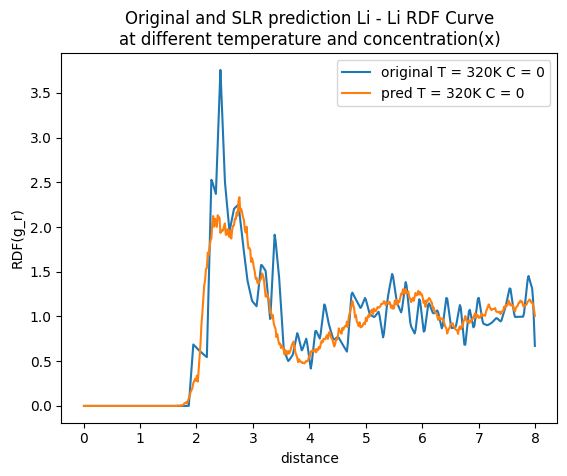

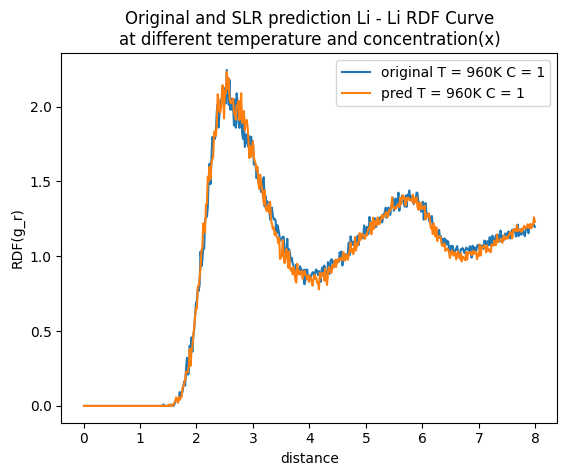

In [17]:
#Plot curve
Tp = [320, 960]
for i in [0, 1]:
    data_ploti = test1.loc[test1['Temp'] == Tp[i]]
    data_ploti = pd.DataFrame(data_ploti, columns=['concentration', 'Temp', 'distance', 'g_r'])
    data_ploti = data_ploti.loc[data_ploti['concentration'] == i]
    data_pred_ploti = test0.loc[test0['Temp'] == Tp[i]]
    data_pred_ploti = pd.DataFrame(data_pred_ploti, columns=['concentration', 'Temp', 'distance', 'g_r'])
    data_pred_ploti = data_pred_ploti.loc[data_pred_ploti['concentration'] == i]
    plt.plot(data_ploti['distance'], data_ploti['g_r'], label=f'original T = {Tp[i]}K C = {i}')
    plt.plot(data_pred_ploti['distance'], data_pred_ploti['g_r'], label=f'pred T = {Tp[i]}K C = {i}')
    plt.legend(loc='upper right', fontsize='medium')
    plt.ylabel('RDF(g_r)')
    plt.xlabel('distance')
    plt.title('Original and SLR prediction Li - Li RDF Curve\nat different temperature and concentration(x)')
    plt.show()